# Analysing ratings of restaurants from Yelp API.
---

In [65]:
# all useful imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS # this module is for making wordcloud in python
import re # regular expression
import string # for finding punctuation in text
import nltk # preprocessing text
from collections import Counter 
from textblob import TextBlob
from  matplotlib.ticker import PercentFormatter
%matplotlib inline

In [66]:
# import data
data = pd.read_csv('data/restaurants_ratings.csv',index_col=0).drop(['id'],axis = 1 )
# Clean the column is_closed
data.replace({'is_closed':{'0.0':True, '1.0':False,'True':True,'False':False }}, inplace=True)


In [ ]:
# Keep only unique 
data = data.drop_duplicates(['Address'],keep = "last")

inspections = pd.read_csv('data/food-inspections.csv')
inspections = inspections.drop_duplicates(['Address'],keep = "last")

a =pd.merge(data, inspections, left_on='Address',right_on='Address',how='left')

a = a.dropna(subset =['Zip'])
a.to_csv('Ratings_with_zip.csv')

In [67]:
# Import list of restaurants affected by food poisoning according to restaurants inspections dataset
fp = pd.read_csv('data/foodPoisoning.csv')


In [70]:
# We check for null values in columns
data.columns[data.isnull().any()].tolist()


[]

In [69]:
# Since we relied on Yelp API to get the data, we saw that sometimes the server doesn't respond or just doesn't give us the data we need
# So we drop all NA values
data = data.dropna(subset=(['price']))

In [61]:
# We check for empty strings
data.columns[(data=='').any()].tolist()

[]

In [71]:
# Since the price column contains dollars, we are going to change dollar signs to integers
data['price'].unique()

array(['$', '$$', '$$$', '$$$$'], dtype=object)

In [72]:
# replace dollar sign to get data that can be parsed because dollar signs cause problems in strings
data = data.astype({'price': 'str'})
data['price'] = data['price'].str.replace('$', '\$')

In [73]:
filter = fp['DBA Name'].tolist()
food_poisoning_data = data[data['Name'].isin(filter)]
normal_data = data[~(data['Name'].isin(filter))]

### 1. Helper functions for plotting

In [93]:
def plot_overall(attribute):
    # see the distribution of all ratings

    overall = data.groupby([attribute]).agg('size').to_frame('count').reset_index()
    # Calculate the percentage
    overall['count'] = (overall['count']/overall['count'].sum())*100
    overall['kind']=attribute

    # Plot the prices
    g = sns.factorplot(x='kind', y='count', hue=attribute,data=overall, kind='bar',palette = 'coolwarm')
    for ax in g.axes.flat:
        ax.yaxis.set_major_formatter(PercentFormatter(100))

    

In [94]:
def plot_comparison(attribute):
    fp_comparison = food_poisoning_data.groupby([attribute]).agg('size').to_frame('count').reset_index()
    normal_comparison = normal_data.groupby([attribute]).agg('size').to_frame('count').reset_index()
    
    # Calculate the percentage
    fp_comparison['count'] = (fp_comparison['count']/fp_comparison['count'].sum())*100
    normal_comparison['count'] = (normal_comparison['count']/normal_comparison['count'].sum())*100
    agg = pd.DataFrame()

    # add kind column to all dataframes then concatenate them to better visualize them in a catplot
    fp_comparison['kind']='Foodpoisoning inspection'
    normal_comparison['kind']='No foodpoisoning inspection'

    agg = pd.concat([fp_comparison,normal_comparison])
    
    # Plotting the attribute
    g = sns.factorplot(x='kind', y='count', hue=attribute, data=agg, kind='bar',palette='coolwarm')
    for ax in g.axes.flat:
        ax.yaxis.set_major_formatter(PercentFormatter(100))




### 2. Comparing price ranges of restaurants

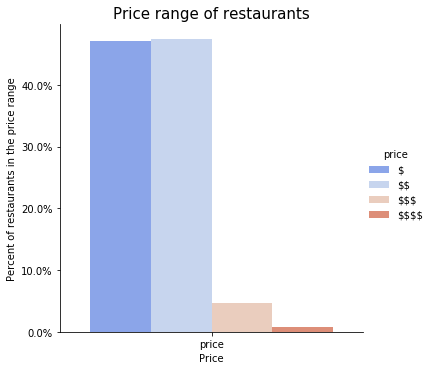

In [101]:
plot_overall('price')
plt.title("Price range of restaurants",fontsize=15)
plt.xlabel('Price',fontsize=10)
plt.ylabel('Percent of restaurants in the price range',fontsize=10);
plt.show()

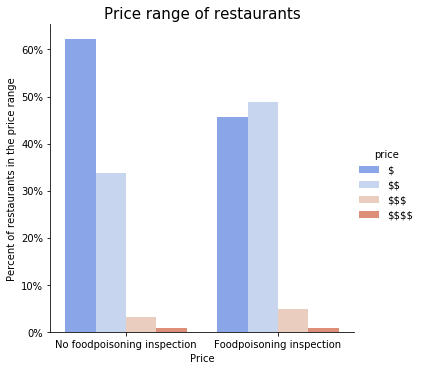

In [102]:
plot_comparison('price')
plt.title("Price range of restaurants",fontsize=15)
plt.xlabel('Price',fontsize=10)
plt.ylabel('Percent of restaurants in the price range',fontsize=10);
plt.show()

### 3. Comparing ratings of restaurants

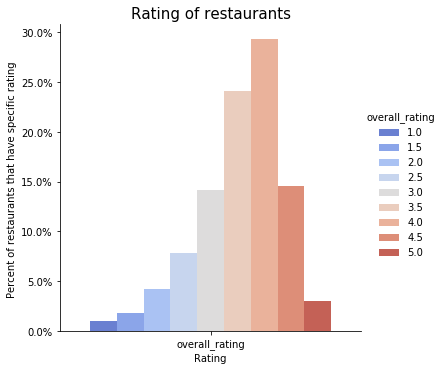

In [98]:
plot_overall('overall_rating')
plt.title("Rating of restaurants",fontsize=15)
plt.xlabel('Rating',fontsize=10)
plt.ylabel('Percent of restaurants that have specific rating ',fontsize=10);
plt.show()

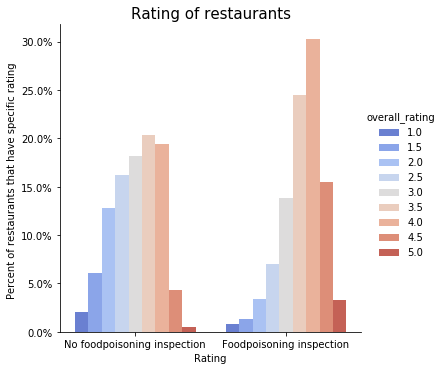

In [100]:
plot_comparison('overall_rating')
plt.title("Rating of restaurants",fontsize=15)
plt.xlabel('Rating',fontsize=10)
plt.ylabel('Percent of restaurants that have specific rating ',fontsize=10);
plt.show()

### 4. Checking if the restaurants are still open

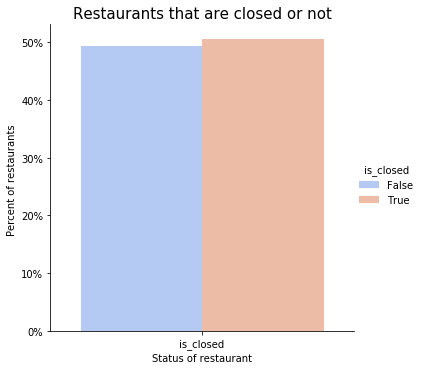

In [103]:
plot_overall('is_closed')
plt.title("Restaurants that are closed or not",fontsize=15)
plt.xlabel('Status of restaurant',fontsize=10)
plt.ylabel('Percent of restaurants ',fontsize=10);
plt.show()


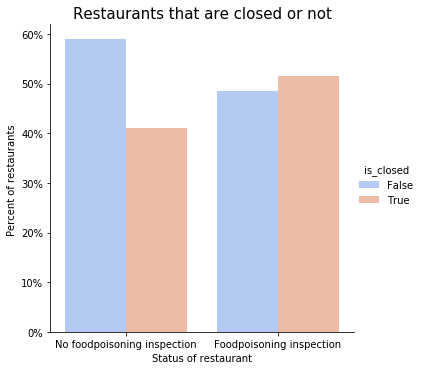

In [104]:
plot_comparison('is_closed')
plt.title("Restaurants that are closed or not",fontsize=15)
plt.xlabel('Status of restaurant',fontsize=10)
plt.ylabel('Percent of restaurants ',fontsize=10);
plt.show()


### 5. Number of reviews per restaurant

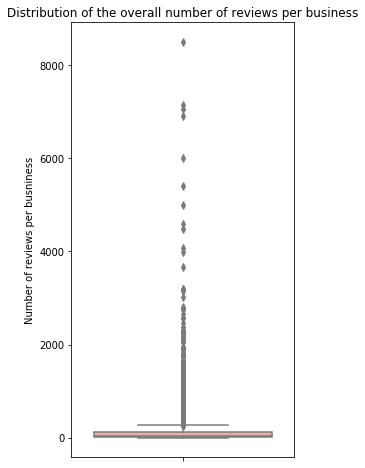

In [105]:
# Plotting the distribution of the overall number of reviews by business
plt.figure(figsize=(4, 8))
sns.boxplot(data.review_count, 
 orient='v', color='#F6A6A0')
plt.ylabel('Number of reviews per busniness')
plt.title("Distribution of the overall number of reviews per business");